In [ ]:
# importing all necessary libraries

# **importing all necessary libraries**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# **Methods to use files**

In [ ]:
def read_pickle(file_name):
    """...."""
    with open(file_name , 'rb') as handle:
        return pickle.load(handle)

In [ ]:
def getScores(model_,X_train_, y_train_, X_val_, y_val_, y_pred_):
    """
    This method gets all the needed scores (accuracy, precision, recall and f1) 
    from the training/validation sets after getting the model, x train and
    validation, y train and validation, and the y predicted
    """
    print("Training Score ",model_.score(X_train_, y_train_))
    print("Validation Score ",model_.score(X_val_, y_val_))
    print("Precision: {:6.4f},   Recall: {:6.4f}, f1: {:6.4f}".format(precision_score(y_val_, y_pred_, average='micro'), 
                                                         recall_score(y_val_, y_pred_, average='micro'),f1_score(y_val_,y_pred_,average='micro')))

# **Read Data from pickle**

In [ ]:
data = read_pickle('/content/Resumes.pickle')
data2 = read_pickle('/content/Resumes_PDF.pickle')

In [ ]:
data.rename(columns = {'hospitality': 'Hospitality'}, inplace = True)

In [ ]:
data4 = data2['Accounting']
data4['Accounting2'] = data4.sum(axis=1)  
data2.drop('Accounting', axis = 1, inplace = True)
data2['Accounting'] = data4['Accounting2']
data2['Business_Administration'] = 0
data2['Management_Information_System'] = 0
data2['Risk_Management'] = 0
data2['Law'] = 0
data2['Graphics_Design'] = 0
data2['Teaching'] = 0
data2['Development'] = 0
data2

<ipython-input-10-67ecff31350a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Accounting2'] = data4.sum(axis=1)


,Finance,Hospitality,Electrical_and_Mechanical_Engineering,Investment,Beauty_Artist,Sales_and_Marketing,Others,Secretarial,Health,Topic_Name,Accounting,Business_Administration,Management_Information_System,Risk_Management,Law,Graphics_Design,Teaching,Development
0,0.020622,0.003994,0.026564,0.000105,0.001173,0.035573,0.012777,0.013299,0.002321,Sales_and_Marketing,0.001799,0,0,0,0,0,0,0
1,0.003947,0.039175,0.009228,0.000000,0.000000,0.000000,0.000000,0.003346,0.003228,Hospitality,0.002189,0,0,0,0,0,0,0
2,0.001116,0.009441,0.003554,0.002858,0.000000,0.013625,0.000000,0.000000,0.000000,Sales_and_Marketing,0.005417,0,0,0,0,0,0,0
3,0.003965,0.047902,0.013113,0.019998,0.011939,0.002183,0.000000,0.001249,0.010942,Hospitality,0.001284,0,0,0,0,0,0,0
4,0.009024,0.047046,0.018793,0.014433,0.000000,0.000000,0.000000,0.000000,0.000964,Hospitality,0.003619,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9769,0.000000,0.036788,0.041363,0.000000,0.028259,0.000000,0.000000,0.005764,0.000000,Electrical_and_Mechanical_Engineering,0.000000,0,0,0,0,0,0,0
9770,0.000000,0.003772,0.000000,0.000000,0.003089,0.000000,0.000000,0.000000,0.000000,Hospitality,0.000000,0,0,0,0,0,0,0
9771,0.008722,0.040875,0.010314,0.024902,0.003389,0.000000,0.000000,0.008236,0.000000,Hospitality,0.022841,0,0,0,0,0,0,0
9772,0.000000,0.046050,0.000000,0.000000,0.017894,0.000102,0.000000,0.003884,0.000000,Hospitality,0.024098,0,0,0,0,0,0,0


In [ ]:
data['Others'] = 0
data['Investment'] = 0
data['Beauty_Artist'] = 0
data['Secretarial'] = 0
data

,Business_Administration,Sales_and_Marketing,Accounting,Management_Information_System,Risk_Management,Law,Electrical_and_Mechanical_Engineering,Health,Graphics_Design,Finance,Teaching,Development,Hospitality,Topic_Name,Others,Investment,Beauty_Artist,Secretarial
0,0.000000,0.008697,0.000000,0.014055,0.006653,0.003310,0.024989,0.003032,0.090258,0.004661,0.004098,0.000000,0.064446,Graphics_Design,0,0,0,0
1,0.000000,0.005236,0.000000,0.007929,0.002672,0.000000,0.000000,0.000000,0.010216,0.000000,0.002681,0.000000,0.007407,Graphics_Design,0,0,0,0
2,0.000957,0.002615,0.000641,0.001609,0.003088,0.000000,0.002199,0.000000,0.035679,0.025605,0.000000,0.024663,0.015660,Graphics_Design,0,0,0,0
3,0.000674,0.018533,0.001030,0.041819,0.002782,0.000000,0.001742,0.000000,0.055123,0.000000,0.014771,0.005212,0.095702,hospitality,0,0,0,0
4,0.000000,0.000000,0.000000,0.000962,0.000000,0.000000,0.000000,0.000000,0.019586,0.000000,0.000000,0.000000,0.000000,Graphics_Design,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0.000000,0.000900,0.000000,0.000000,0.026945,0.014721,0.006585,0.000000,0.000000,0.017832,0.005155,0.048813,0.000000,Development,0,0,0,0
1253,0.001167,0.000000,0.000000,0.000000,0.000000,0.000287,0.000000,0.000000,0.000000,0.012673,0.000000,0.122075,0.000000,Development,0,0,0,0
1254,0.000786,0.000000,0.000000,0.000000,0.000000,0.001056,0.000000,0.000000,0.000000,0.013257,0.000000,0.170425,0.000000,Development,0,0,0,0
1255,0.000000,0.011364,0.000000,0.000000,0.036696,0.000000,0.000000,0.001671,0.000000,0.000000,0.000000,0.060086,0.000000,Development,0,0,0,0


In [ ]:
data = pd.concat([data, data2])

In [ ]:
data.index = range(0, 11031)
data

,Business_Administration,Sales_and_Marketing,Accounting,Management_Information_System,Risk_Management,Law,Electrical_and_Mechanical_Engineering,Health,Graphics_Design,Finance,Teaching,Development,Hospitality,Topic_Name,Others,Investment,Beauty_Artist,Secretarial
0,0.000000,0.008697,0.000000,0.014055,0.006653,0.00331,0.024989,0.003032,0.090258,0.004661,0.004098,0.000000,0.064446,Graphics_Design,0.0,0.000000,0.000000,0.000000
1,0.000000,0.005236,0.000000,0.007929,0.002672,0.00000,0.000000,0.000000,0.010216,0.000000,0.002681,0.000000,0.007407,Graphics_Design,0.0,0.000000,0.000000,0.000000
2,0.000957,0.002615,0.000641,0.001609,0.003088,0.00000,0.002199,0.000000,0.035679,0.025605,0.000000,0.024663,0.015660,Graphics_Design,0.0,0.000000,0.000000,0.000000
3,0.000674,0.018533,0.001030,0.041819,0.002782,0.00000,0.001742,0.000000,0.055123,0.000000,0.014771,0.005212,0.095702,hospitality,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000962,0.000000,0.00000,0.000000,0.000000,0.019586,0.000000,0.000000,0.000000,0.000000,Graphics_Design,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11026,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.041363,0.000000,0.000000,0.000000,0.000000,0.000000,0.036788,Electrical_and_Mechanical_Engineering,0.0,0.000000,0.028259,0.005764
11027,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003772,Hospitality,0.0,0.000000,0.003089,0.000000
11028,0.000000,0.000000,0.022841,0.000000,0.000000,0.00000,0.010314,0.000000,0.000000,0.008722,0.000000,0.000000,0.040875,Hospitality,0.0,0.024902,0.003389,0.008236
11029,0.000000,0.000102,0.024098,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046050,Hospitality,0.0,0.000000,0.017894,0.003884


In [41]:
data.isnull().sum()

Business_Administration                  0
Sales_and_Marketing                      0
Accounting                               0
Management_Information_System            0
Risk_Management                          0
Law                                      0
Electrical_and_Mechanical_Engineering    0
Health                                   0
Graphics_Design                          0
Finance                                  0
Teaching                                 0
Development                              0
Hospitality                              0
Topic_Name                               0
Others                                   0
Investment                               0
Beauty_Artist                            0
Secretarial                              0
dtype: int64

In [42]:
X = data.drop('Topic_Name', axis = 1)
y = data.Topic_Name

In [43]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=.2, random_state=77)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=77)

In [44]:
print('X_train  ==> ',X_train.shape)
print('y_train  ==> ',y_train.shape)
print()
print('X_val    ==> ',X_val.shape)
print('y_val    ==> ',y_val.shape)
print()
print('X_test   ==> ',X_test.shape)
print('y_test   ==> ',y_test.shape)

X_train  ==>  (8824, 17)
y_train  ==>  (8824,)

X_val    ==>  (1103, 17)
y_val    ==>  (1103,)

X_test   ==>  (1104, 17)
y_test   ==>  (1104,)


In [ ]:
corr = data.corr()
corr

<ipython-input-14-df690e1cacaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Business_Administration,Sales_and_Marketing,Accounting,Management_Information_System,Risk_Management,Law,Electrical_and_Mechanical_Engineering,Health,Graphics_Design,Finance,Teaching,Development,Hospitality,Others,Investment,Beauty_Artist,Secretarial
Business_Administration,1.000000,0.018776,-0.024676,0.058580,0.099397,0.085556,0.017360,-0.008371,0.027545,0.025543,0.094601,0.090414,-0.068868,-0.013435,-0.041926,-0.053559,-0.022443
Sales_and_Marketing,0.018776,1.000000,-0.011219,0.029469,0.020559,-0.000098,-0.047560,-0.003431,0.024718,0.043274,0.050237,0.016510,-0.075117,-0.001838,-0.008915,-0.056224,-0.014415
Accounting,-0.024676,-0.011219,1.000000,-0.006147,0.039244,-0.013095,-0.059957,-0.027539,-0.002615,-0.015302,-0.011851,-0.007473,-0.113762,-0.025632,0.016325,-0.093322,-0.000090
Management_Information_System,0.058580,0.029469,-0.006147,1.000000,0.044871,0.018094,-0.031075,-0.007592,0.151949,0.008886,0.080131,0.087066,-0.035797,-0.012847,-0.040090,-0.051214,-0.021460
Risk_Management,0.099397,0.020559,0.039244,0.044871,1.000000,0.026256,-0.051510,0.030562,0.065470,-0.013836,0.090662,0.115581,-0.116764,-0.023347,-0.072858,-0.093074,-0.039000
Law,0.085556,-0.000098,-0.013095,0.018094,0.026256,1.000000,-0.024188,-0.004179,0.014646,0.002273,0.041937,0.051322,-0.037942,-0.007910,-0.024685,-0.031535,-0.013214
Electrical_and_Mechanical_Engineering,0.017360,-0.047560,-0.059957,-0.031075,-0.051510,-0.024188,1.000000,0.011997,-0.034417,-0.103419,-0.026973,-0.026799,-0.093878,-0.034510,-0.052392,-0.152751,-0.008774
Health,-0.008371,-0.003431,-0.027539,-0.007592,0.030562,-0.004179,0.011997,1.000000,-0.015051,-0.040031,0.018026,-0.000622,-0.068283,-0.018893,-0.037058,-0.059556,-0.019338
Graphics_Design,0.027545,0.024718,-0.002615,0.151949,0.065470,0.014646,-0.034417,-0.015051,1.000000,-0.014400,0.059015,0.045031,-0.055748,-0.016899,-0.052736,-0.067369,-0.028229
Finance,0.025543,0.043274,-0.015302,0.008886,-0.013836,0.002273,-0.103419,-0.040031,-0.014400,1.000000,0.027574,-0.011236,-0.079054,0.004873,0.035646,-0.120712,0.087751


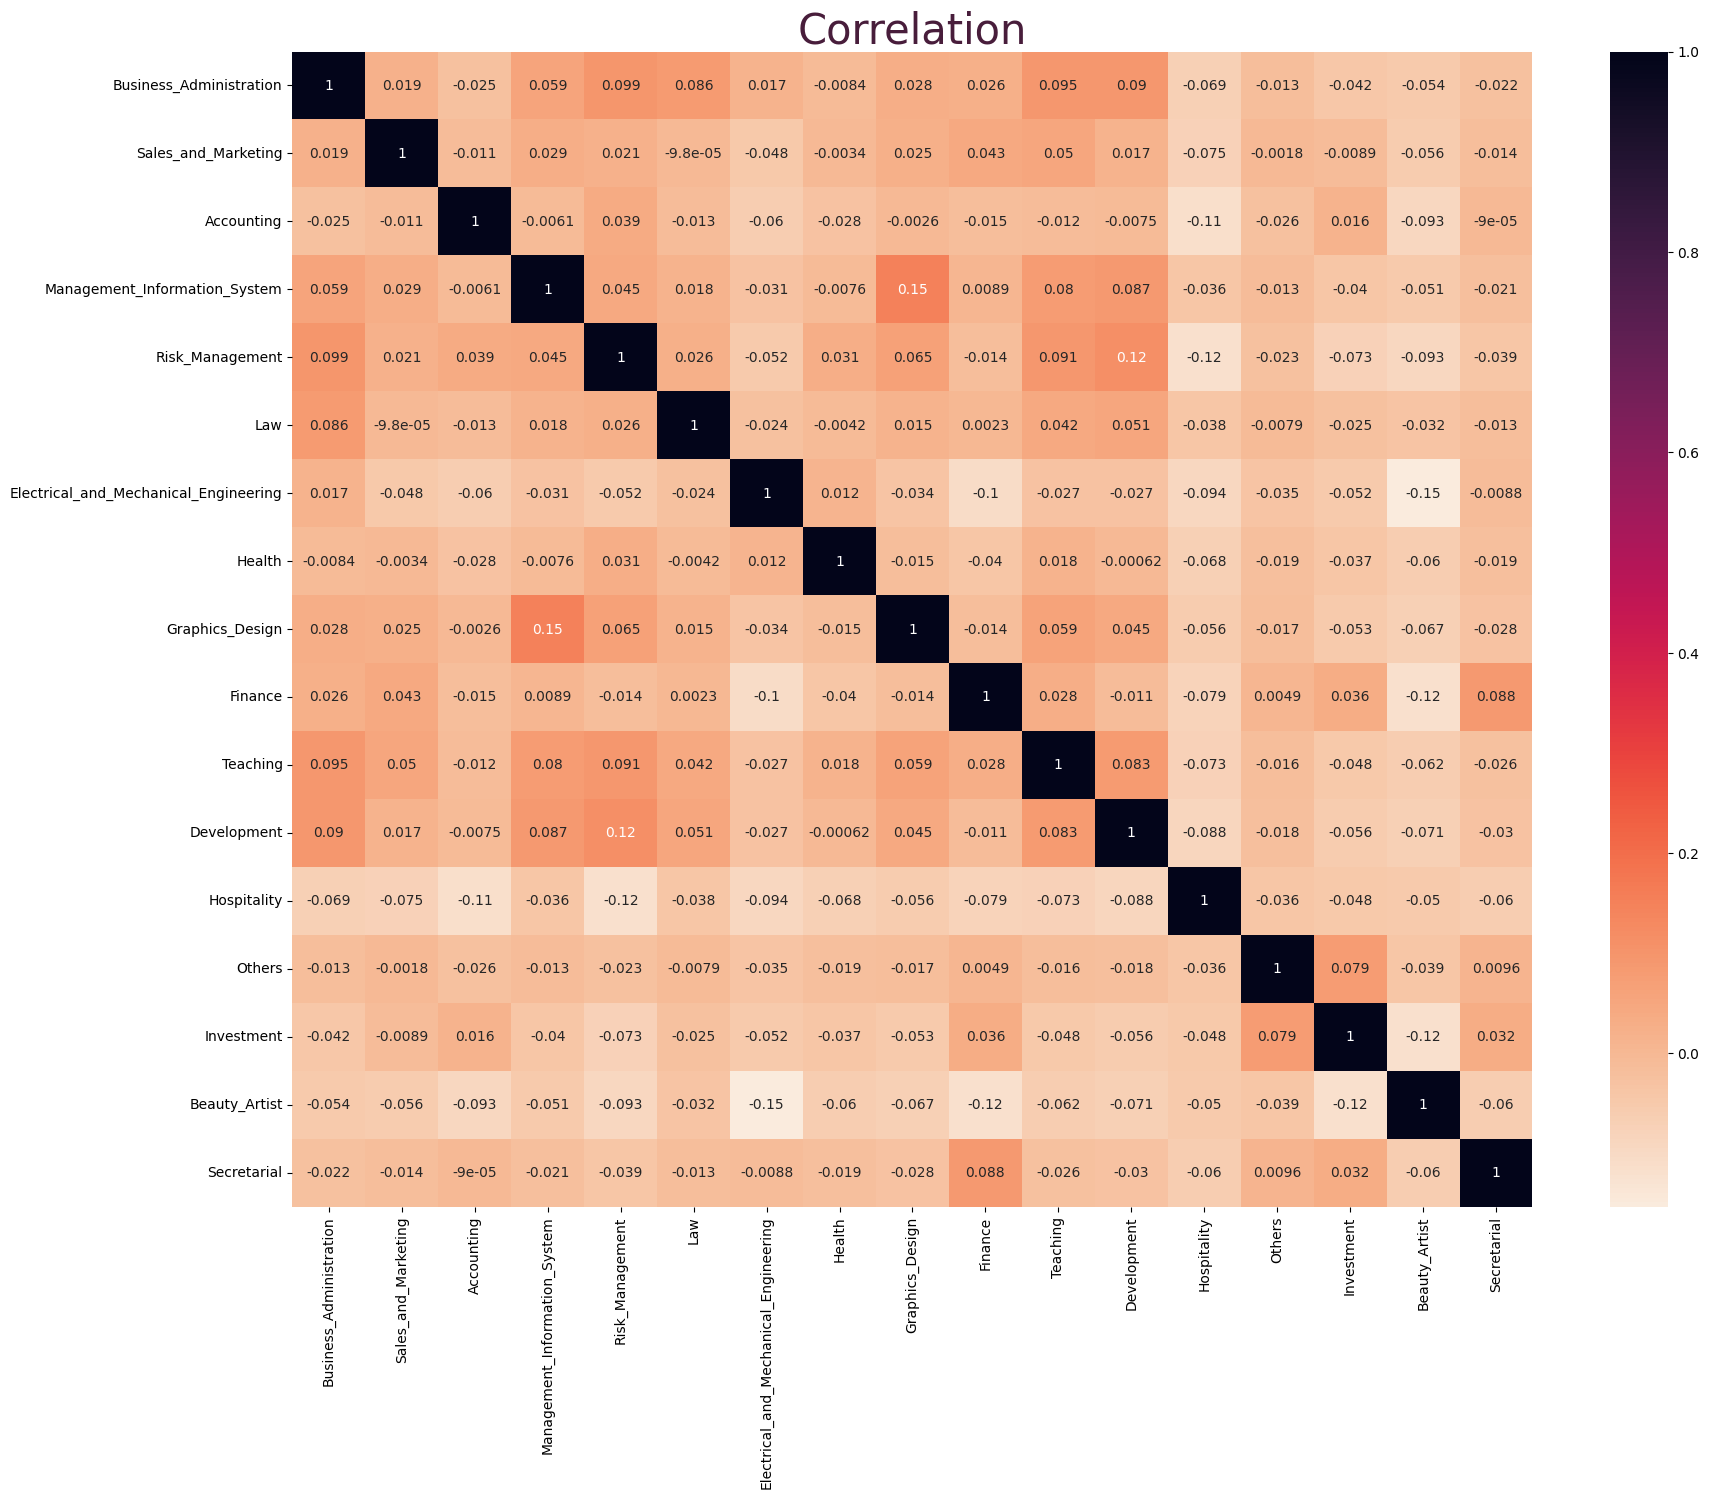

In [ ]:
import seaborn as sns
plt.figure(figsize = [20,15])
sns.heatmap(corr, annot = True, cmap = sns.cm.rocket_r );
plt.title('Correlation', color= '#481D3B', fontsize=30);

# **Now applying deep learning models**

In [ ]:
X = data.drop('Topic_Name', axis = 1)
y = data.Topic_Name

In [50]:
# Determine the number of classes
num_classes = len(np.unique(y_train))

In [45]:
# Prepare the data
X_train_padded = pad_sequences(X_train.values)
X_val_padded = pad_sequences(X_val.values)

In [47]:
# Reshape the input data
X_train_reshaped = np.reshape(X_train_padded, (X_train_padded.shape[0], X_train_padded.shape[1], 1))
X_val_reshaped = np.reshape(X_val_padded, (X_val_padded.shape[0], X_val_padded.shape[1], 1))

In [51]:
# Define the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [52]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
y_train

10623                              Hospitality
287                        Sales_and_Marketing
2847                                Accounting
9538                                   Finance
9337                               Hospitality
                         ...                  
7832     Electrical_and_Mechanical_Engineering
9509                               Hospitality
2283                               Hospitality
10196                            Beauty_Artist
8799     Electrical_and_Mechanical_Engineering
Name: Topic_Name, Length: 8824, dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert target variable to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [57]:
# Convert encoded labels to categorical
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

In [59]:
# Define the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train_categorical, epochs=15, batch_size=32, validation_data=(X_val_reshaped, y_val_categorical))

Epoch 1/15
276/276 [==============================] - 7s 15ms/step - loss: 2.3010 - accuracy: 0.2340 - val_loss: 2.1603 - val_accuracy: 0.2566
Epoch 2/15
276/276 [==============================] - 3s 9ms/step - loss: 2.2132 - accuracy: 0.2418 - val_loss: 2.1661 - val_accuracy: 0.2566
Epoch 3/15
276/276 [==============================] - 3s 10ms/step - loss: 2.2064 - accuracy: 0.2517 - val_loss: 2.1584 - val_accuracy: 0.2566
Epoch 4/15
276/276 [==============================] - 3s 9ms/step - loss: 2.2007 - accuracy: 0.2539 - val_loss: 2.1558 - val_accuracy: 0.2566
Epoch 5/15
276/276 [==============================] - 4s 15ms/step - loss: 2.1943 - accuracy: 0.2551 - val_loss: 2.1570 - val_accuracy: 0.2566
Epoch 6/15
276/276 [==============================] - 3s 10ms/step - loss: 2.1968 - accuracy: 0.2567 - val_loss: 2.1539 - val_accuracy: 0.2566
Epoch 7/15
276/276 [==============================] - 3s 10ms/step - loss: 2.1922 - accuracy: 0.2571 - val_loss: 2.1619 - val_accuracy: 0.2566
E